In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./files/df_format.csv")
df.head(2)

,data_pesquisa,id_empresa,rede,endereco_completo,codigo_categoria,id_produto,descricao,preco_regular,preco_atacado,preco_atacado_qtd,preco_promocao,preco_fidelidade
0,2025-07-31,17.0,Agricer,"Rua Izaac Ferreira da Cruz, 1440 - Pinheirinho...",5.0,2048,BACON SUÍNO -FRIGONOVAK -1 KG,34.99,0.0,0,0.0,0.0
1,2025-07-31,17.0,Agricer,"Rua Izaac Ferreira da Cruz, 1440 - Pinheirinho...",5.0,2055,LINGUIÇA CALABRESA -FRIGONOVAK -1 KG,34.99,0.0,0,0.0,0.0


Quais mercados oferecem os preços mais baixos em geral?

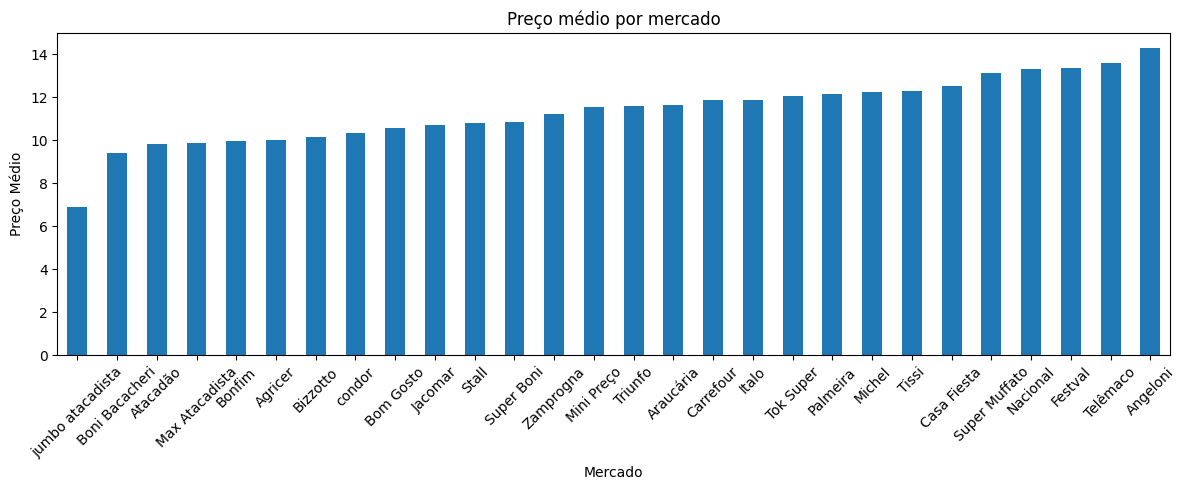

In [7]:
precos_por_mercado = df.groupby("rede")["preco_regular"].mean().sort_values()
plt.figure(figsize=(12, 5))
precos_por_mercado.plot(kind='bar')
plt.ylabel('Preço Médio')
plt.xlabel('Mercado')
plt.title('Preço médio por mercado')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Existe uma diferença significativa de preços entre mercados de diferentes regiões da cidade?

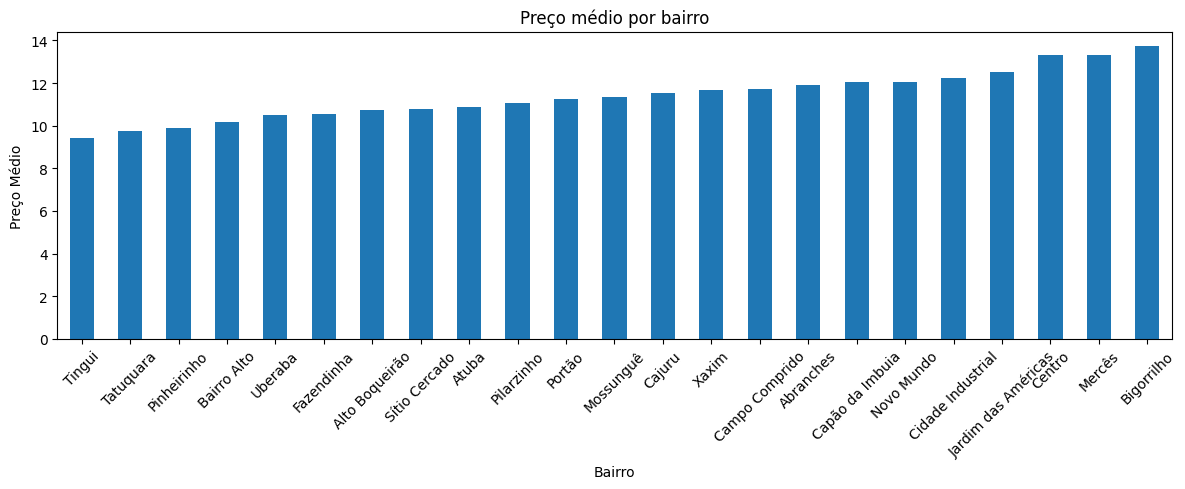

In [4]:
df["bairro"] = df["endereco_completo"].str.extract(r'- ([^-\n]+) - Curitiba/PR')
preco_bairro = df.groupby("bairro")["preco_regular"].mean().sort_values()
plt.figure(figsize=(12,5))
preco_bairro.plot(kind='bar')
plt.ylabel('Preço Médio')
plt.xlabel('Bairro')
plt.title('Preço médio por bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Quais produtos têm maior variação de preço entre os mercados? (usando desvio padrao calculando todos os mercados)

In [9]:
variacao_produtos = df.groupby("descricao")["preco_regular"].std().sort_values(ascending=False)

display(variacao_produtos.head(10))

descricao
CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO -1 KG            24.639033
CARNE BOVINA PICANHA -( + ) BARATO -1 KG                        23.038708
CARNE BOVINA ALCATRA COM MAMINHA S/ OSSO -( + ) BARATO -1 KG    21.837613
ALMONDEGA BOVINA CONGELADA -( + ) BARATO -1 KG                  16.315564
CARNE BOVINA FRALDINHA S/ OSSO -( + ) BARATO -1 KG              16.234570
CARNE BOVINA PATINHO S/ OSSO ( PEDAÇO ) -( + ) BARATO -1 KG     15.169542
CARNE BOVINA CONTRA FILE C/ OSSO -( + ) BARATO -1 KG            14.768881
CARNE BOVINA ALCATRA S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG       14.342667
KIWI NACIONAL -1 KG                                             14.153963
CARNE BOVINA COXÃO MOLE S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG    13.844100
Name: preco_regular, dtype: float64

Quais produtos têm maior variação de preço entre os mercados? (usando a coluna preço e calculando todos os mercados)

In [13]:
intervalo_produtos = (df.groupby("descricao")["preco_regular"].max() - df.groupby("descricao")["preco_regular"].min()).sort_values(ascending=False)

display(intervalo_produtos.head(10))

descricao
CARNE BOVINA PICANHA -( + ) BARATO -1 KG                            118.90
CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO -1 KG                 95.25
CARNE BOVINA COXÃO MOLE S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG         72.98
CARNE BOVINA PATINHO S/ OSSO ( PEDAÇO ) -( + ) BARATO -1 KG          69.99
CARNE BOVINA CONTRA FILE C/ OSSO -( + ) BARATO -1 KG                 68.90
CARNE BOVINA CONTRA FILE S/ OSSO -( + ) BARATO -1 KG                 65.99
BACON -( + ) BARATO -1 KG                                            64.99
CARNE BOVINA ALCATRA S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG            64.90
CARNE BOVINA FRALDINHA S/ OSSO -( + ) BARATO -1 KG                   59.98
CARNE BOVINA POSTA VERMELHA S/ OSSO (PEDAÇO) -( + ) BARATO -1 KG     59.98
Name: preco_regular, dtype: float64

visualização dos preços em ordem do maior para o menor para uma breve analise

In [48]:
df[df["descricao"].str.contains("CARNE BOVINA", case=False, na=False)][["descricao", "preco_regular", "rede"]].sort_values("preco_regular", ascending=False).head(20)

,descricao,preco_regular,rede
11217,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,118.90,Angeloni
10365,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,109.98,Festval
3071,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,97.50,Palmeira
12601,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,95.25,Zamprogna
4737,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,95.09,Nacional
6122,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,89.99,condor
3799,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,89.90,Italo
8131,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,87.90,Tok Super
5291,CARNE BOVINA PICANHA -( + ) BARATO -1 KG,85.99,Festval
11212,CARNE BOVINA FILE MIGNON S/ OSSO -( + ) BARATO...,85.99,Angeloni
